In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
product_data_id = 'MLM1000_1000'
similarity_type = 'thumbnail'
df = pd.read_csv(f'./data_warehouse/{similarity_type}_similarity/{similarity_type}_similarity_{product_data_id}.csv')

In [3]:
#similarity_df[similarity_df['similarity_score']<0.99].sort_values(by='similarity_score',ascending=False).head(10)
different_product_index = df['catalog_product_id_x']!=df['catalog_product_id_y']
different_brand_index = df['brand_x']!=df['brand_y']

df_a = df[different_product_index & different_brand_index]
df_a.sort_values(by='similarity_score',ascending=False).head(10)

,domain_id,catalog_product_id_x,catalog_product_id_y,semantic_string_x,semantic_string_y,brand_x,brand_y,similarity_score
117924,MLM-HEADPHONES,MLM25915118,MLM29599699,Audífonos Gamer Bluetooth Inalámbricos P9 Mode...,Audífonos Inalámbrico Diadema Con Microfono Bl...,Genérica,Vulata,0.998799
92052,MLM-HEADPHONES,MLM29599699,MLM25915118,Audífonos Inalámbrico Diadema Con Microfono Bl...,Audífonos Gamer Bluetooth Inalámbricos P9 Mode...,Vulata,Genérica,0.998799
11509,MLM-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,MLM22795819,MLM21303411,Cable De Video Hdmi 3 Metros Full Hd Xbox Lapt...,Cable Hdmi 1.5 Metros Full Hd 1080p Ps3 Xbox 3...,Genérica,Transhine,0.998171
95518,MLM-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,MLM21303411,MLM22795819,Cable Hdmi 1.5 Metros Full Hd 1080p Ps3 Xbox 3...,Cable De Video Hdmi 3 Metros Full Hd Xbox Lapt...,Transhine,Genérica,0.998171
118081,MLM-HEADPHONES,MLM25915118,MLM28901848,Audífonos Gamer Bluetooth Inalámbricos P9 Mode...,Audífonos Inalámbrico Diadema Con Microfono Bl...,Genérica,Vulata,0.998127
192326,MLM-HEADPHONES,MLM28901848,MLM25915118,Audífonos Inalámbrico Diadema Con Microfono Bl...,Audífonos Gamer Bluetooth Inalámbricos P9 Mode...,Vulata,Genérica,0.998127
192413,MLM-HEADPHONES,MLM28901848,MLM26326121,Audífonos Inalámbrico Diadema Con Microfono Bl...,Audífonos Gamer Inalámbricos Sw-ahead Audífono...,Vulata,SW-AHEAD,0.989249
173718,MLM-HEADPHONES,MLM26326121,MLM28901848,Audífonos Gamer Inalámbricos Sw-ahead Audífono...,Audífonos Inalámbrico Diadema Con Microfono Bl...,SW-AHEAD,Vulata,0.989249
92139,MLM-HEADPHONES,MLM29599699,MLM26326121,Audífonos Inalámbrico Diadema Con Microfono Bl...,Audífonos Gamer Inalámbricos Sw-ahead Audífono...,Vulata,SW-AHEAD,0.988886
173561,MLM-HEADPHONES,MLM26326121,MLM29599699,Audífonos Gamer Inalámbricos Sw-ahead Audífono...,Audífonos Inalámbrico Diadema Con Microfono Bl...,SW-AHEAD,Vulata,0.988886


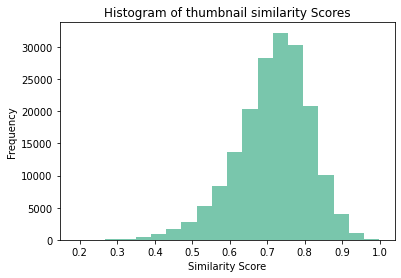

In [17]:
# Create histogram using seaborn
sns.histplot(data=df_a, x='similarity_score', bins=20, color="#4CB391",edgecolor='none')
plt.title(f'Histogram of {similarity_type} similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

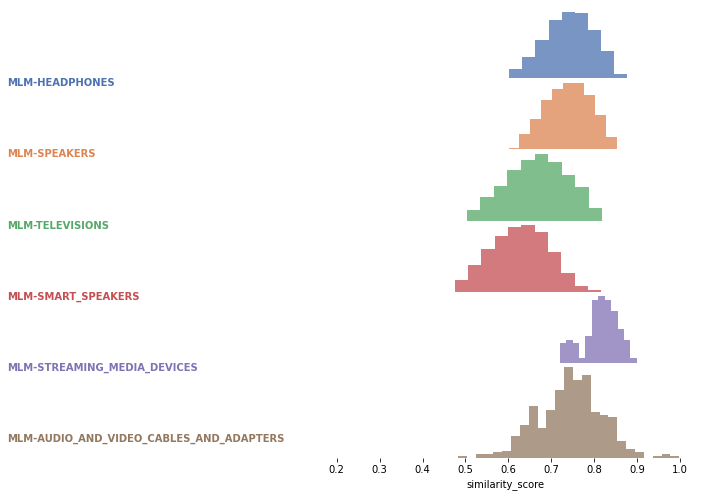

In [23]:
top_domains = df_a['domain_id'].value_counts().head(6)
df_b = df_a[df_a['domain_id'].isin(top_domains.index)]

# Initialize the FacetGrid object with sharey=False
pal = sns.color_palette("deep")
g = sns.FacetGrid(df_b, row="domain_id", hue="domain_id", aspect=20, height=1.2, palette=pal, sharey=False)

# Draw the histograms
g.map(sns.histplot, "similarity_score", bins=25,edgecolor='none')

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.8, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "similarity_score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)
#g.title(f'Histogram of {similarity_type} similarity Scores')

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()


In [6]:
df_a['domain_id'].value_counts()

MLM-HEADPHONES                             89770
MLM-SPEAKERS                               57734
MLM-TELEVISIONS                            15512
MLM-SMART_SPEAKERS                         15350
MLM-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS      752
MLM-STREAMING_MEDIA_DEVICES                  446
MLM-CELL_BATTERIES                           402
MLM-MICROPHONES                              228
MLM-SOUND_CONSOLES_AND_MIXERS                118
MLM-DRONES                                    96
MLM-PROJECTORS                                64
MLM-LED_STAGE_LIGHTS                          60
MLM-HOME_THEATERS                             34
MLM-TV_AND_MONITOR_MOUNTS                     30
MLM-BATTERY_AND_CELL_BATTERIES_CHARGERS       30
MLM-SPEAKERS_STANDS                            6
MLM-TV_ANTENNAS                                6
MLM-MEGAPHONES                                 4
MLM-MINI_COMPONENT_SYSTEMS                     4
MLM-EMBEDDED_SWITCH_MODE_POWER_SUPPLIES        2
MLM-AUDIO_CROSSOVERS

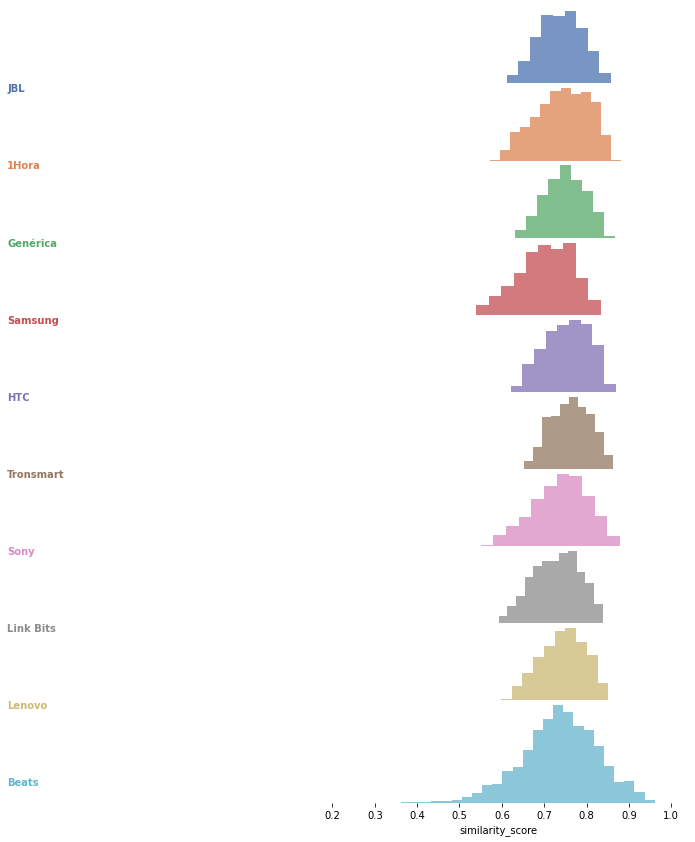

In [24]:
top_brands = df_a['brand_x'].value_counts().head(10)
df_c = df_a[df_a['brand_x'].isin(top_brands.index)]

# Initialize the FacetGrid object with sharey=False
pal = sns.color_palette("deep")
g = sns.FacetGrid(df_c, row="brand_x", hue="brand_x", aspect=20, height=1.2, palette=pal, sharey=False)

# Draw the histograms
g.map(sns.histplot, "similarity_score", bins=25, edgecolor='none')

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.8, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "similarity_score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)
#g.title(f'Histogram of {similarity_type} similarity Scores')

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()